In [2]:
import numpy as np
import tensorflow as tf
tf.__version__

'2.2.0'

Keras tiene bastantes datasets de ejemplo implementados. En este caso vamos a importar uno que son números escritos a mano 28x28 bits, son 10 dígitos. Son 60 0000 imágenes, así que la array que recibiremos son (60000, 28, 28) para train. De test, (10000, 28, 28)

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Ahora vamos a visualizar los datos para inspeccionarlos un poco

In [4]:
import matplotlib.pyplot as plt

def display_digit(num):
    image = x_train[num,:,:]
    label = y_train[num]
    
    plt.title(f"Example: {num}; Label: {label}")
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

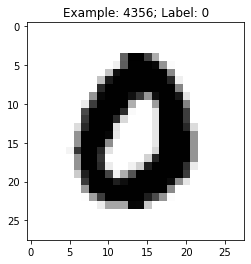

In [5]:
display_digit(np.random.randint(0, x_train.shape[0]))

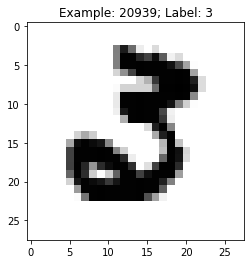

In [6]:
display_digit(np.random.randint(0, x_train.shape[0]))

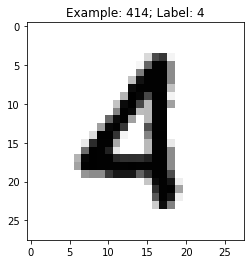

In [7]:
display_digit(np.random.randint(0, x_train.shape[0]))

## Acondicionamiento de datos

En esta parte vamos a acondicionar los datos para usarlos en nuestra red neuronal

In [8]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train, x_te = x_train / 255.0, x_test / 255.0 # Números pequeños para que los gradientes no se vayan al infinito
y_train = to_categorical(y_train, num_classes=10) # One hot encoder

y_te = to_categorical(y_test)
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)
print(y_tr.shape)

(54000, 10)


## Creamos un perceptrón multicapa

In [11]:
# Nuestra red va a ser secuencial
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape=(28, 28))) # pasa el input a 1 dimensión 
model.add(Dense(512, input_shape=(28 * 28,), activation="relu"))
model.add(Dense(10, activation="softmax")) # Capa salida: mismo número de neuronas que de clases

In [12]:
from tensorflow.keras.optimizers import SGD

model.compile(loss="categorical_crossentropy", optimizer=SGD(0.005), metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## Ahora la entrenamos 

In [14]:
H = model.fit(x_tr, y_tr, validation_data=(x_val, y_val), epochs=50, batch_size=128)

Epoch 1/50
422/422 [==============================] - 1s 3ms/step - loss: 1.4807 - accuracy: 0.6520 - val_loss: 0.9651 - val_accuracy: 0.8165
Epoch 2/50
422/422 [==============================] - 1s 2ms/step - loss: 0.7711 - accuracy: 0.8378 - val_loss: 0.6473 - val_accuracy: 0.8573
Epoch 3/50
422/422 [==============================] - 1s 2ms/step - loss: 0.5783 - accuracy: 0.8658 - val_loss: 0.5283 - val_accuracy: 0.8752
Epoch 4/50
422/422 [==============================] - 1s 2ms/step - loss: 0.4935 - accuracy: 0.8791 - val_loss: 0.4658 - val_accuracy: 0.8850
Epoch 5/50
422/422 [==============================] - 1s 3ms/step - loss: 0.4450 - accuracy: 0.8874 - val_loss: 0.4259 - val_accuracy: 0.8897
Epoch 6/50
422/422 [==============================] - 1s 3ms/step - loss: 0.4129 - accuracy: 0.8927 - val_loss: 0.3985 - val_accuracy: 0.8943
Epoch 7/50
422/422 [==============================] - 1s 3ms/step - loss: 0.3895 - accuracy: 0.8970 - val_loss: 0.3783 - val_accuracy: 0.8985
Epoch 

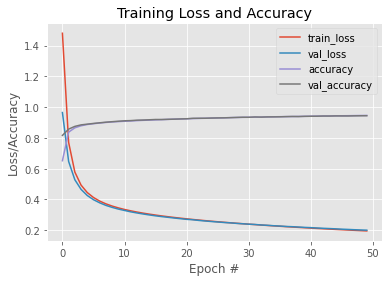

In [15]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), H.history["accuracy"], label="accuracy")
plt.plot(np.arange(0, 50), H.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## Predicciones

In [16]:
from sklearn.metrics import classification_report

predictions = model.predict(x_te, batch_size=128)

print(classification_report(y_te.argmax(axis=1), predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.94      0.94      0.94      1032
           3       0.93      0.94      0.94      1010
           4       0.94      0.95      0.94       982
           5       0.94      0.92      0.93       892
           6       0.94      0.96      0.95       958
           7       0.95      0.94      0.95      1028
           8       0.94      0.92      0.93       974
           9       0.93      0.93      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [17]:
predictions[0]

array([6.1795603e-05, 2.6502957e-07, 3.8080118e-04, 3.3314682e-03,
       1.3308701e-06, 4.9379651e-05, 4.2076138e-08, 9.9592531e-01,
       1.9804591e-05, 2.2972203e-04], dtype=float32)

In [18]:
predictions[0].argmax(axis=0)

7

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
